<a href="https://colab.research.google.com/github/norrilsk/GraphCourse/blob/main/lectures/Graph_Course_lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритмы на графах. Занятие № 4

##Определения

Пусть есть связный неоринетированный граф $G = (V,E)$ <br>
Пусть для  каждого ребра $(u,v) \in E$ задан вес $w(u,v)$
Тогда ациклическое подмножество $T ⊆ E$, которое соединяет все вершины и чей общий вес $w(t) = ∑_{(u,v) \in T}w(u,v)$ минимален называется **остовным деревом** (spanning tree) графа G


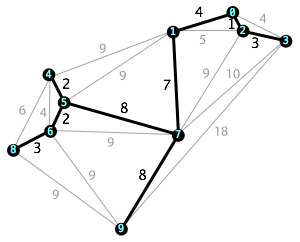

**Разрезом** **(cut)** $(S, T)$ неориентированного графа
$G = (V,E)$ называется разбиение $V$,что

1. $S \cup T = V$
2. $S \cap T = ∅$

Мы говорим, что ребро $(u, v) ∈ E$ **пересекает (crosses)** разрез $(S, V − S)$, если
один из его концов оказывается в множестве $S$, а второй — в $V −S$.

 Разрез **согласован** **(respect)** с множеством $A$ по ребрам, если ни одно ребро из A не пересекает
разрез.

Ребро, пересекающее разрез, является **легким (light)**, если оно имеет минимальный вес среди всех ребер, пересекающих разрез.

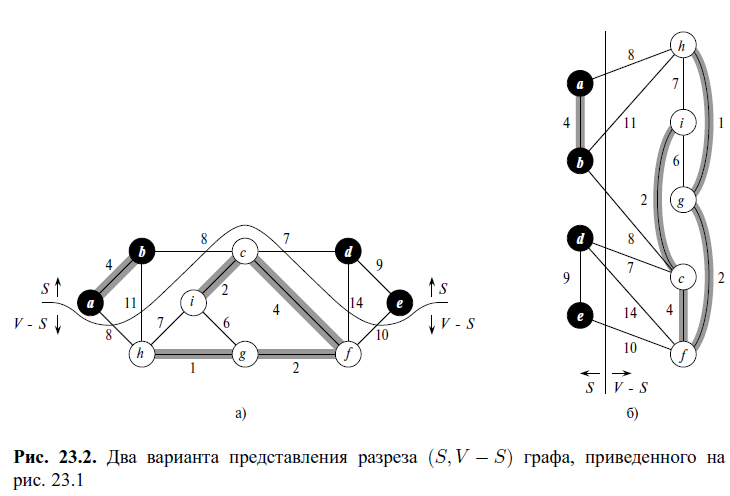

##Пирамиды


### Биноминальные пирамиды


**Биномиальная пирамида** (binomial heap) $H$ представляет собой множество
биномиальных деревьев, которые удовлетворяют следующим свойствам бино-
миальных пирамид.
1. Каждое биномиальное дерево в H подчиняется свойству **неубывающей пирамиды** (min-heap property): ключ узла не меньше ключа его родительского
узла. Мы говорим, что такие деревья являются **упорядоченными в соответствии со свойством неубывающей пирамиды** (min-heap-ordered).
2. Для любого неотрицательного целого $k$ имеется не более одного биномиального дерева $H$, чей корень имеет степень $k$.

Из второго свойства следует, что биномиальная пирамида H, содержащая n
узлов, состоит не более чем из $[lg(n)]+1$ биномиальных деревьев.

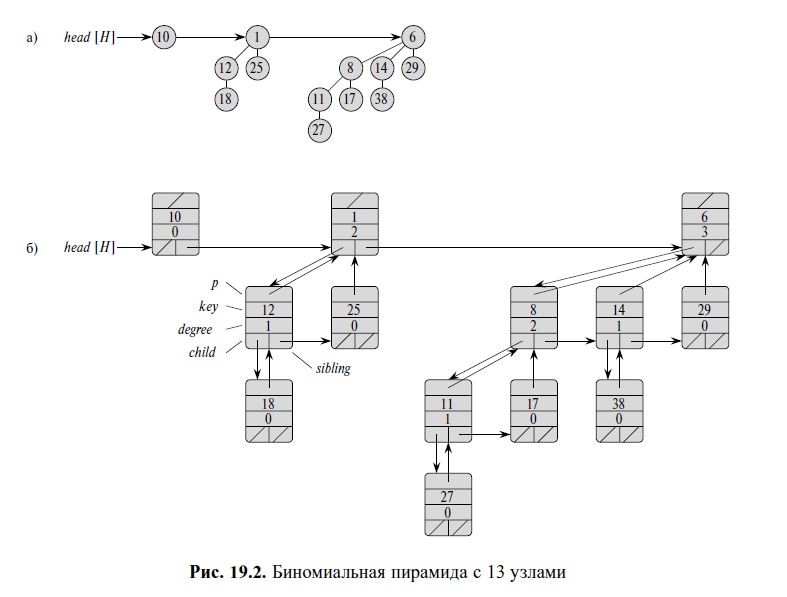

#### Поиск минимального ключа


$BINOMIAL\_HEAP\_MINIMUM(H)$ <br>
$\quad y ← NIL$ <br>
$\quad x ← head[H]$ <br>
$\quad min ←∞$ <br>
$\quad \textbf{while}\; x != NIL$ <br>
$\quad \quad \textbf{do}\; \textbf{if}\; key[x] < min$ <br>
$\quad \quad \quad \textbf{then}\; min ← key[x]$ <br>
$\quad \quad \quad \quad y ← x$ <br>
$\quad \quad \quad x ← sibling[x]$ <br>
$\quad \textbf{return}\; y$ <br>

<details>
<summary>Сложность</summary>
$O(lg(n))$
&emsp;
</details>

#### Слияние пирамид


$BINOMIAL\_LINK(y, z)$<br>
$\quad p[y] ← z$<br>
$\quad sibling[y] ← child[z]$<br>
$\quad child[z] ← y$<br>
$\quad degree[z] ← degree[z] + 1$<br>

$BINOMIAL\_HEAP\_UNION(H1,H2)$ <br>
$\quad H ← MAKE\_BINOMIAL\_HEAP()$ <br>
$\quad head[H] ← BINOMIAL\_HEAP\_MERGE(H1,H2)$ <br>
$\quad $Освобождение объектов H1 и H2, но не списков, на которые они указывают <br>
$\quad \textbf{if}\; head[H] = NIL$ <br>
$\quad \quad \textbf{then}\; \textbf{return}\; H$ <br>
$\quad prev\_x ← NIL$ <br>
$\quad x ← head[H]$ <br>
$\quad next\_x ← sibling[x]$ <br>
$\quad \textbf{while}\; next\_x \neq NIL$ <br>
$\quad \quad \textbf{do} \;\textbf{if}\; (degree[x] \neq degree[next\_x ])\; или\; (sibling[next\_x ] \neq NIL \; и \; degree[sibling[next\_x ]] = degree[x])$ <br>
$\quad \quad \quad \textbf{then}\; prev\_x ← x$  // Случаи 1 и 2 <br>
$\quad \quad \quad \quad x ← next\_x$  // Случаи 1 и 2 <br>
$\quad \quad \quad \textbf{else}\; \textbf{if}\; key[x] \leq key[next\_x ]$ <br>
$\quad \quad \quad \quad \textbf{then}\; sibling[x] ← sibling[next\_x ]$  // Случай 3 <br>
$\quad \quad \quad \quad \quad  BINOMIAL\_LINK(next\_x, x)$    //  Случай 3 <br>
$\quad \quad \quad \quad \textbf{else}\; \textbf{if}\; prev\_x = NIL$    // Случай 4 <br>
$\quad \quad \quad \quad \quad \textbf{then}\; head[H] ← next\_x$   /// Случай 4 <br>
$\quad \quad \quad \quad \quad \textbf{else}\; sibling[prev\_x ] ← next\_x$   // Случай 4 <br>
$\quad \quad \quad \quad \quad BINOMIAL\_LINK(x, next\_x )$    // Случай 4 <br>
$\quad \quad \quad \quad \quad x ← next\_x$  // Случай 4 <br>
$\quad \quad \quad \quad next-x ← sibling[x]$ <br>
$\quad \textbf{return}\; H$ <br>

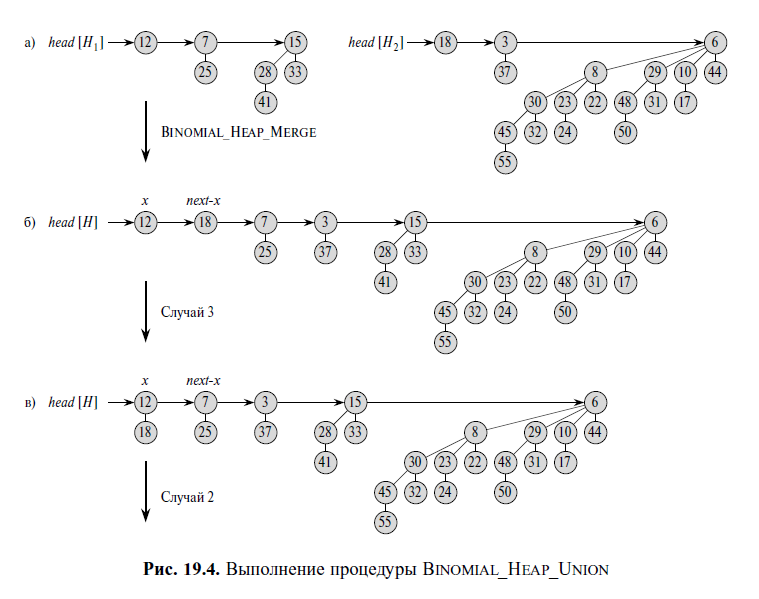

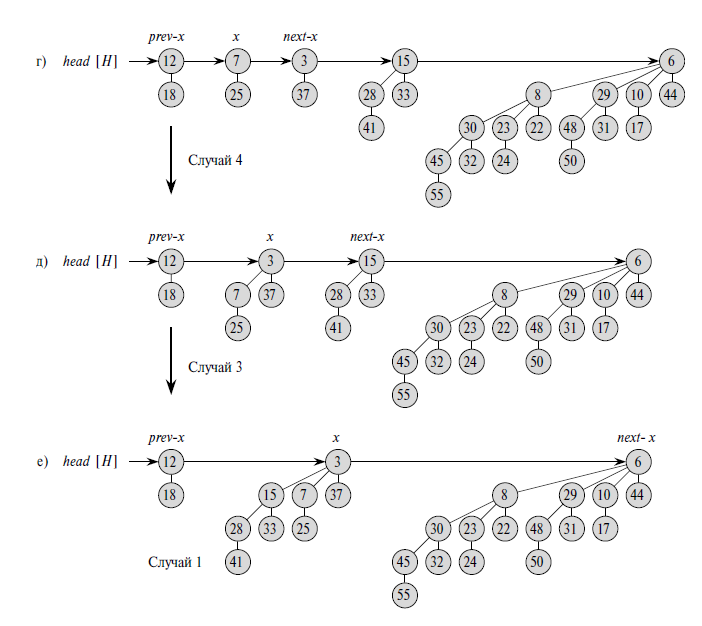

<details>
<summary>Сложность</summary>
Время работы процедуры $BINOMIAL\_HEAP\_UNION$ равно $O (lg(n))$, где $n$ — об-
щее количество узлов в биномиальных пирамидах H1 и H2.
&emsp;
</details>


#### Вставка
$BINOMIAL\_HEAP\_INSERT(H, x)$ <br>
$\quad H' ← MAKE\_BINOMIAL\_HEAP()$<br>
$\quad p[x] ← NIL$<br>
$\quad child[x] ← NIL$<br>
$\quad sibling[x] ← NIL$<br>
$\quad degree[x] ← 0$<br>
$\quad head[H'] ← x$<br>
$\quad H ← BINOMIAL\_HEAP\_UNION(H,H')$<br>

#### Извлечение вершины с минимальным ключом

$BINOMIAL\_HEAP\_EXTRACT_MIN(H)$ <br>
$\quad$Поиск корня $x$ с минимальным значением ключа в списке корней $H$, и удаление $x$ из списка корней $H$ <br>
$\quad$ $H' ← MAKE\_BINOMIAL\_HEAP()$ <br>
$\quad$ Обращение порядка связанного списка дочерних узлов $x$,
установка поля p каждого дочернего узла равным $NIL$
и присвоение указателю $head[H']$ адреса заголовка
получающегося списка<br>
$\quad H ← BINOMIAL\_HEAP\_UNION(H,H')$<br>
$\quad \textbf{return}\; x$

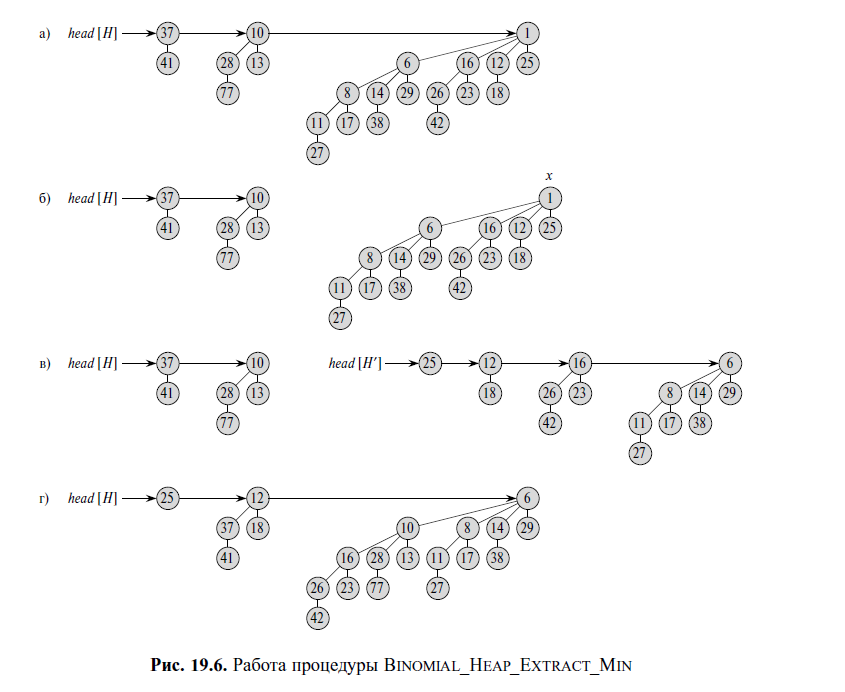

#### Уменьшение ключа

$BINOMIAL\_HEAP\_DECREASE_KEY(H, x, k)$ <br>
$\quad \textbf{if} \; k > key[x]$<br>
$\quad \quad \textbf{then} \; \textbf{error}\;$   “Новый ключ больше текущего”<br>
$\quad key[x] ← k$<br>
$\quad y ← x$<br>
$\quad z ← p[y]$<br>
$\quad \textbf{while}\; z \neq NIL \;и\; key[y] < key[z]$<br>
$\quad \quad \textbf{do}\; Обменять \; key[y] ↔ key[z]$<br>
$\quad \quad \quad Если \; y \;и\; z\; содержат\; сопутствующую\;информацию, обменять\;также \;и \;ее$<br>
$\quad \quad \quad  y ← z$<br>
$\quad \quad \quad  z ← p[y]$<br>

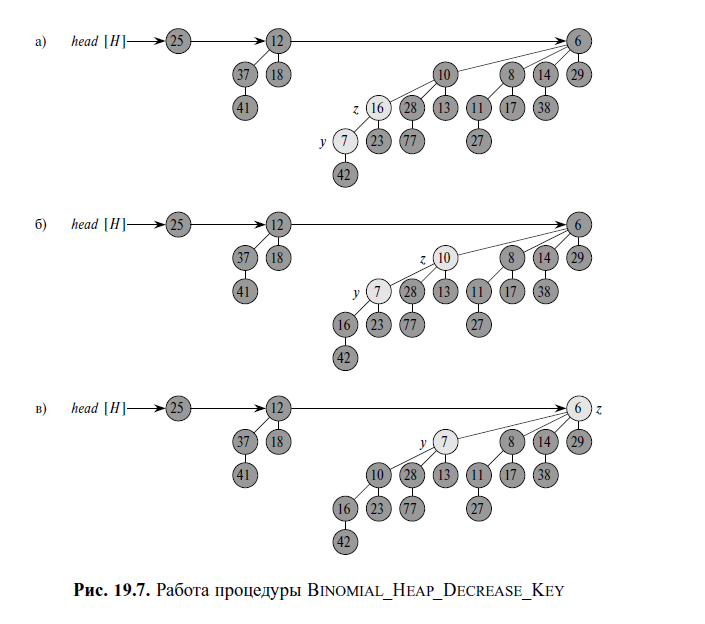

#### Удаление элемента

$BINOMIAL\_HEAP\_DELETE(H, x)$<br>
$\quad BINOMIAL\_HEAP\_DECREASE\_KEY(H, x,−∞)$<br>
$\quad BINOMIAL\_HEAP\_EXTRACT\_MIN(H)$<br>

### Фиббоначиевы пирамиды

Мы познакомились с биномиальными пирамидами, для которых
время выполнения операций $INSERT$, $MINIMUM$, $EXTRACT\_MIN$, $UNION$, а также
$DECREASE\_KEY$ и $DELETE$ в худшем случае равно $O (lg (n))$.

 мы познакомимся с фибоначчиевыми пирамидами, которые поддерживают тот же набор
операций, но имеют то преимущество, что операции, в которых не требуется
удаление, имеют амортизированное время работы, равное $O (1)$.

**Фибоначчиева пирамида** (Fibonacci
heap) представляет собой набор деревьев, упорядоченных в соответствии со свойством неубывающей пирамиды. Однако в случае фибоначчиевых пирамид деревья не обязательно должны быть биномиальными

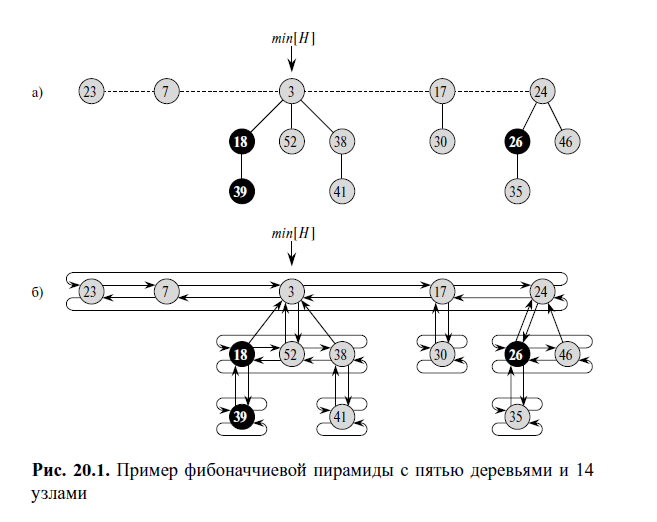

#### TODO: метод потенциалов

**Неупорядоченное биномиальное дерево** (unordered binomial tree)
похоже на обычное биномиальное дерево и определяется рекурсивно подобно
ему. Неупорядоченное биномиальное дерево $U_0$ состоит из единственного узла,
а неупорядоченное биномиальное дерево $U_k$ состоит из двух неупорядоченных биномиальных деревьев $U_{k−1}$, причем корень одного из них является произвольным
дочерним узлом корня другого.

#### Вставка

$FIB\_HEAP\_INSERT(H, x)$<br>
$ \quad degree[x] ← 0$<br>
$ \quad p[x] ← NIL$<br>
$ \quad child[x] ← NIL$<br>
$ \quad left[x] ← x$<br>
$ \quad right[x] ← x$<br>
$ \quad mark[x] ← FALSE$<br>
$ \quad Присоединение\; списка \;корней,\; содержащего \;x,\; к \;списку \;корней \; H$<br>
$ \quad \textbf{if} \; min[H] = NIL\; или \; key[x] < key[min[H]]$<br>
$ \quad \quad \textbf{then} \;  min[H] ← x$<br>
$ \quad n[H] ← n[H] + 1$<br>

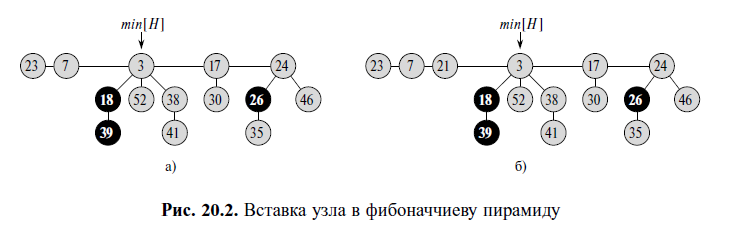

<details>
<summary>Сложность</summary>
$O(1)$
&emsp;
</details>

#### Объединение двух фибоначчиевых пирамид

$ FIB\_HEAP\_UNION(H_1,H_2)$ <br>
$\quad H ← MAKE\_FIB\_HEAP()$ <br>
$\quad min[H] ← min[H_1]$ <br>
$\quad Добавление \;списка \;корней\; H_2 \;к\; списку\; корней\; H$ <br>
$\quad \textbf{if}\; (min[H_1] = NIL)\; или \;(min[H_2] \neq NIL\; и\; key[min[H_2]] < key[min[H_1]])$ <br>
$\quad \quad \textbf{then}\; min[H] ← min[H_2]$ <br>
$\quad n[H] ← n[H_1] + n[H_2]$ <br>
$\quad Освобождение объектов \;H_1 \;и \;H_2$ <br>
$\quad \textbf{return} \;H$ <br>

<details>
<summary>Сложность</summary>
$O(n)$
&emsp;
</details>

#### Извлечение минимального узла

$FIB\_HEAP\_EXTRACT\_MIN(H)$<br>
$\quad z ← min[H]$<br>
$\quad \textbf{if}\; z \neq NIL$<br>
$\quad \quad \textbf{then}\; \textbf{for} \; (для) \;каждого\; дочернего \;по\; отношению\; к\ z \;узла\; x$<br>
$\quad \quad \quad \textbf{do}\; Добавить \;x\; в\; список\; корней\; H$<br>
$\quad \quad \quad \quad p[x] ← NIL$<br>
$\quad \quad \quad Удалить\; z\; из \;списка\; корней\; H$<br>
$\quad \quad \quad \textbf{if}\; z = right[z]$<br>
$\quad \quad \quad \quad \textbf{then}\; min[H] ← NIL$<br>
$\quad \quad \quad \quad \textbf{else}\; min[H] ← right[z]$<br>
$\quad \quad \quad \quad \quad CONSOLIDATE(H)$<br>
$\quad \quad \quad n[H] ← n[H] − 1$<br>
$\quad \textbf{return}\; z$<br>




$CONSOLIDATE(H)$<br>
$\quad \textbf{for}\; i ← 0\; \textbf{to}\; D(n[H])$ // $D(n)$ - количество деревьев <br>
$\quad \quad \textbf{do}\; A[i] ← NIL$<br>
$\quad \textbf{for}\; (для) \;каждого\; узла\; w \;в\; списке\; корней\; H$<br>
$\quad \quad \textbf{do}\; x ← w$<br>
$\quad \quad \quad d ← degree[x]$<br>
$\quad \quad \quad \textbf{while}\; A[d] \neq NIL$<br>
$\quad \quad \quad \quad \textbf{do}\; y ← A[d] \;\;\;\ // Узел\; с\; той\; же степенью, \;что \;и \;у\; x.\;$<br>
$\quad \quad \quad \quad \quad \textbf{if}\; key[x] > key[y]$<br>
$\quad \quad \quad \quad \quad \quad \textbf{then}\; обменять x ↔ y$<br>
$\quad \quad \quad \quad \quad FIB\_HEAP\_LINK(H, y, x)$<br>
$\quad \quad \quad \quad \quad A[d] ← NIL$<br>
$\quad \quad \quad \quad \quad d ← d + 1$<br>
$\quad \quad A[d] ← x$<br>
$\quad min[H] ← NIL$<br>
$\quad \textbf{for}\; i ← 0 \; \textbf{to}\; D(n[H])$<br>
$\quad \quad \textbf{do}\; \textbf{if}\; A[i] \neq NIL$<br>
$\quad \quad \quad \textbf{then}\; Добавить\; A[i] \;в\; список \;корней\; H$<br>
$\quad \quad \quad \quad \textbf{if}\; min[H] = NIL \;или\; key[A[i]] < key[min[H]]$<br>
$\quad \quad \quad \quad \quad \textbf{then}\; min[H] ← A[i]$<br>


$FIB\_HEAP\_LINK(H, y, x)$<br>
$ \quad $Удалить $y$ из списка корней $H$<br>
$ \quad $Сделать y дочерним узлом $x$, увеличить $degree[x]$<br>
$ \quad mark[y] ← FALSE$ <br>

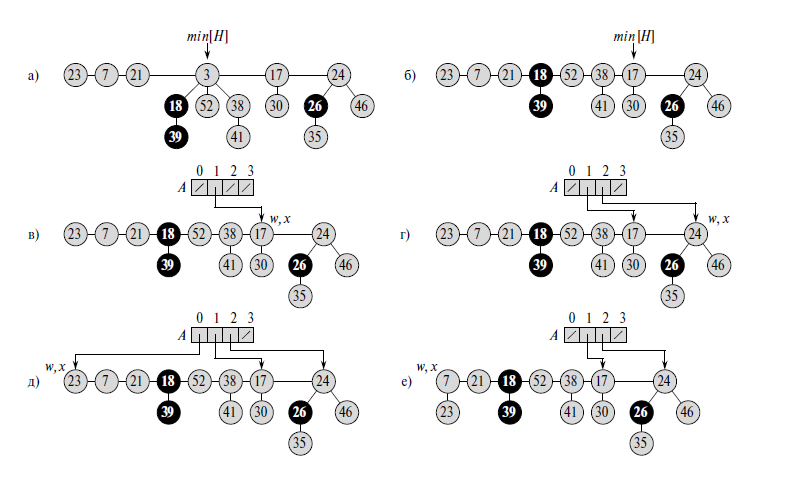

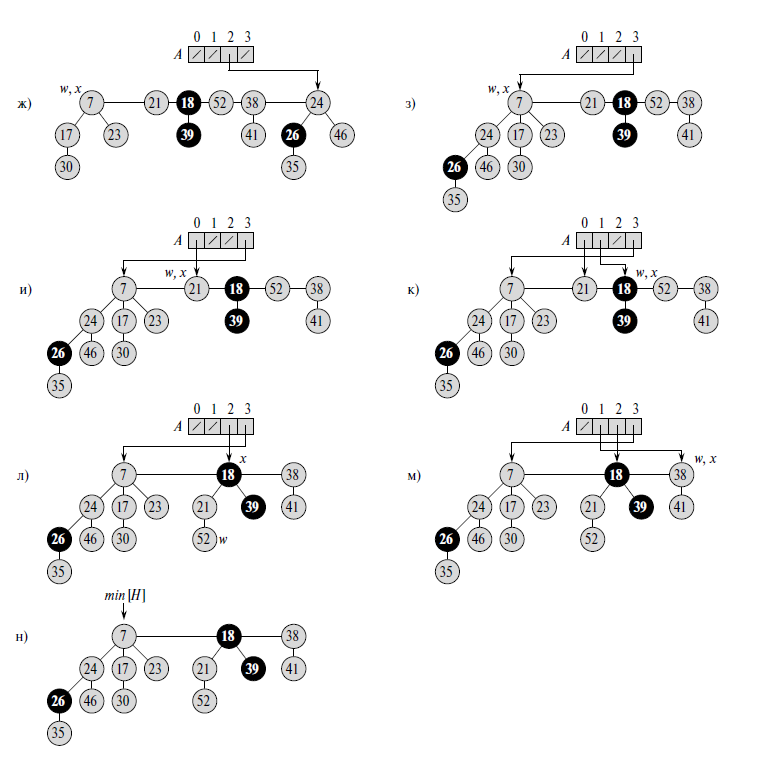

<details>
<summary>Сложность</summary>
$O(n)$
&emsp;
</details>

#### Уменьшение ключа

$FIB\_HEAP\_DECREASE\_KEY(H, x, k)$<br>
$\quad \textbf{if} \; k > key[x]$<br>
$\quad \quad \textbf{then} \;\textbf{error}\; “Новый\; ключ \;больше \;текущего”$<br>
$\quad key[x] ← k$<br>
$\quad y ← p[x]$<br>
$\quad \textbf{if}\; y \neq NIL\; и\; key[x] < key[y]$<br>
$\quad \quad \textbf{then}\; CUT(H, x, y)$<br>
$\quad \quad \quad CASCADING\_CUT(H, y)$<br>
$\quad \textbf{if}\; key[x] < key[min[H]]$<br>
$\quad \quad \textbf{then}\; min[H] ← x$<br>


$CUT(H, x, y)$<br>
$ \quad Удаление\; x\; из\; списка\; дочерних\; узлов\; y,\; уменьшение\; degree[y]$<br>
$ \quad Добавление\; x\; в\; список\; корней\; H$<br>
$ \quad p[x] ← NIL$<br>
$ \quad mark[x] ← FALSE$<br>

$CASCADING\_CUT(H, y)$<br>
$\quad z ← p[y]$<br>
$\quad \textbf{if}\; z \neq NIL$<br>
$\quad \quad \textbf{then}\; \textbf{if}\; mark[y] = FALSE$<br>
$\quad \quad \quad \textbf{then}\; mark[y] ← TRUE$<br>
$\quad \quad \quad \textbf{else}\; CUT(H, y, z)$<br>
$\quad \quad \quad \quad CASCADING\_CUT(H, z)$<br>

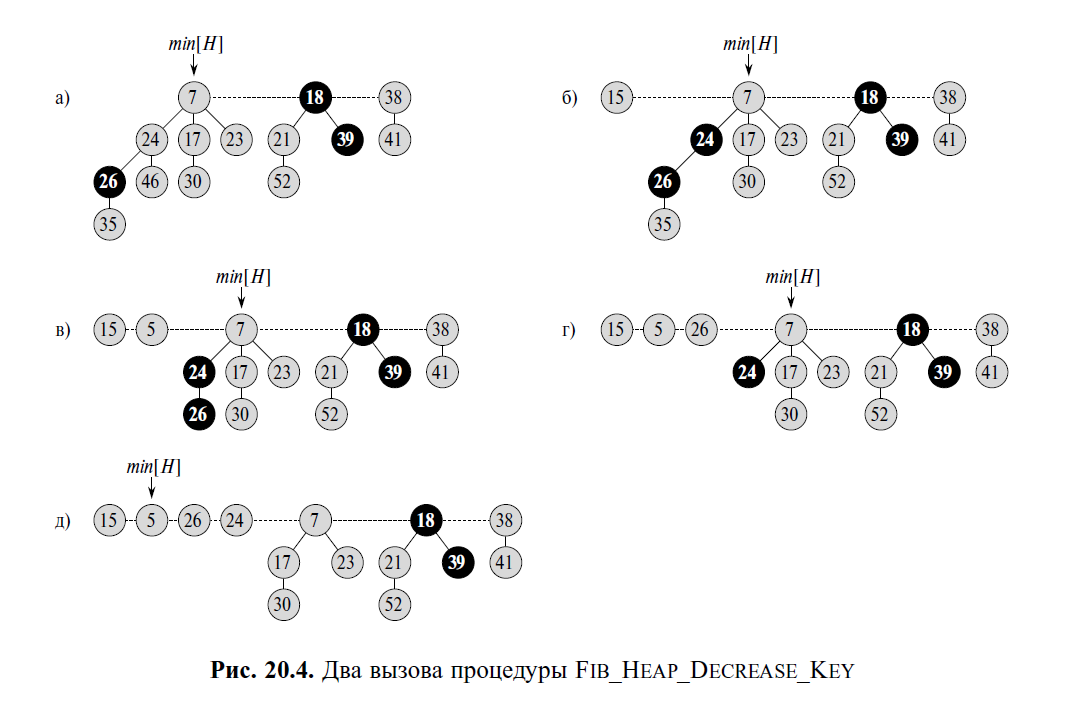

Сложность $O(1)$

#### Удаление

$FIB\_HEAP\_DELETE(H, x)$ <br>
$ \quad FIB\_HEAP\_DECREASE\_KEY(H, x,−∞)$<br>
$ \quad FIB\_HEAP\_EXTRACT\_MIN(H)$<br>

##Построение минимального остовного дерева



Для построения минимального остовного дерева будем использовать жадный подход.<br>
Минимальное остовное дерево будет расти  путем добавления к нему ребер по одному.


Алгоритм работает с множеством ребер A, и инвариант цикла алгоритма выглядит следующим образом



```
Перед каждой очередной итерацией A представляет собой подмножество некоторого минимального остовного дерева.
```

$GENERIC\_MST(G,w)$<br>
$\quad A ← ∅$<br>
$\quad \textbf{while}\; A \;$не является минимальным остовным деревом<br>
$\quad \quad \textbf{do}$ Найти безопасное для A ребро $(u, v)$<br>
$\quad \quad \quad A ← A ∪ {(u, v)}$<br>
$\quad \textbf{return} \; A$<br>

**Теорема 23.1.** Пусть $G = (V,E)$ — связный неориентированный граф с действительной весовой функцией $w$, определенной на $E$. Пусть $A$ — подмножество $E$,
которое входит в некоторое минимальное остовное дерево $G$, $(S, V − S)$ — разрез
$G$, согласованный с $A$ по ребрам, а $(u, v)$ — легкое ребро, пересекающее разрез
$(S, V − S)$. Тогда ребро $(u, v)$ является безопасным для $A$.

<details>
<summary>Доказательство</summary>
&emsp;
Пусть $T$ — минимальное остовное дерево, которое включает
$A$, и предположим, что $T$ не содержит ребро $(u, v)$, поскольку в противном случае теорема доказана. Мы построим другое минимальное остовное дерево $T^{'}$,
которое включает $A∪\{(u, v)\}$


Ребро $(u, v)$ образует цикл с ребрами на пути p от u к v в T, как показано на
рис. Поскольку $u$ и $v$ находятся на разных сторонах разреза $(S, V − S)$, на
пути $p$ имеется как минимум одно ребро из $T$, которое пересекает разрез. Пусть
таким ребром является ребро $(x, y)$. Ребро $(x, y)$ не входит в $A$, поскольку разрез
согласован с $A$ по ребрам. Так как $(x, y)$ является единственным путем от $u$ к $v$ в $T$,
его удаление разбивает T на два компонента. Добавление $(u, v)$ восстанавливает
разбиение, образуя новое остовное дерево $T^{'} = T − \{(x, y)\} ∪ \{(u, v)\}$.

Теперь мы покажем, что $T^{'} — минимальное остовное дерево.

Поскольку
$(u, v)$ — легкое ребро, пересекающее разбиение $(S, V − S)$, и $(x, y)$ также пересекает это разбиение, $w (u, v) \leq w (x, y)$. Следовательно,
$$w(T^{'}) = w (T) − w (x, y) + w (u, v) \leq w (T)$$ .

Однако T — минимальное остовное дерево, так что $w (T) \leq w (T^{'})$. Следователь-
но, T^{'} также должно быть минимальным остовным деревом.
Остается показать, что $(u, v)$ действительно безопасное ребро для $A$.
Мы имеем $A ⊆ T^{'}$, поскольку $A ⊆ T и (x, y) \notin
A$. Таким образом, $A ∪ {(u, v)} ⊆ T^{'}$
и, поскольку $T^{'}$ — минимальное остовное дерево, ребро $(u, v)$ безопасно для A


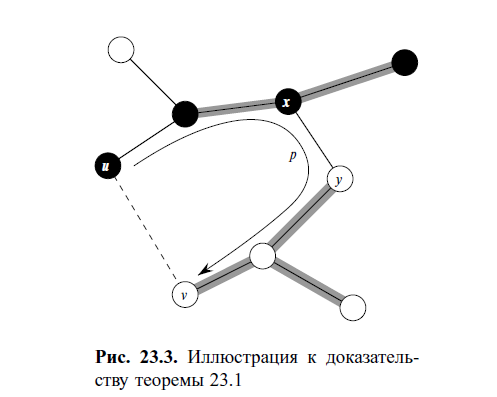
</details>

<details>
<summary>Задание 1</summary>
&emsp;
Пусть $(u, v)$ — ребро минимального веса в графе $G$
принадлежит ли $(u,v)$ минимальному остовному дереву?
</details>
<details>
<summary>Задание 2</summary>
&emsp;
Рассмотрим множество всех ребер, каждый элемент которого является
легким ребром для какого-то из возможных разрезов графа. Приведите
простой пример, когда такое множество не образует минимального остовного дерева.
</details>
<details>
<summary>Задание 3</summary>
&emsp;
Покажите, что если вес любого из ребер графа положителен, то любое
подмножество ребер, объединяющее все вершины и имеющее минимальный общий вес, должно быть деревом. Приведите пример, показывающий, что это не так, если ребра могут иметь отрицательный вес
</details>


## Алгоритм Крускала

$MST\_KRUSKAL(G,w)$<br>
$\quad A ← ∅$<br>
$\quad \textbf{for}$ (Для) каждой вершины $v ∈ V [G]$<br>
$\quad \quad \textbf{do} \; MAKE\_SET(v)$<br>
$\quad $Сортируем ребра из $E$ в неубывающем порядке их весов $w$<br>
$\quad \textbf{for}$ (Для) каждого $(u, v) ∈ E$ (в порядке возрастания веса)<br>
$\quad \quad \textbf{do} \;\textbf{if}\; FIND\_SET(u) \neq FIND\_SET(v)$<br>
$\quad \quad \quad \textbf{then} \; A ← A ∪ {(u, v)}$<br>
$\quad \quad \quad \quad UNION(u, v)$<br>
$\quad \textbf{return}\; A$<br>

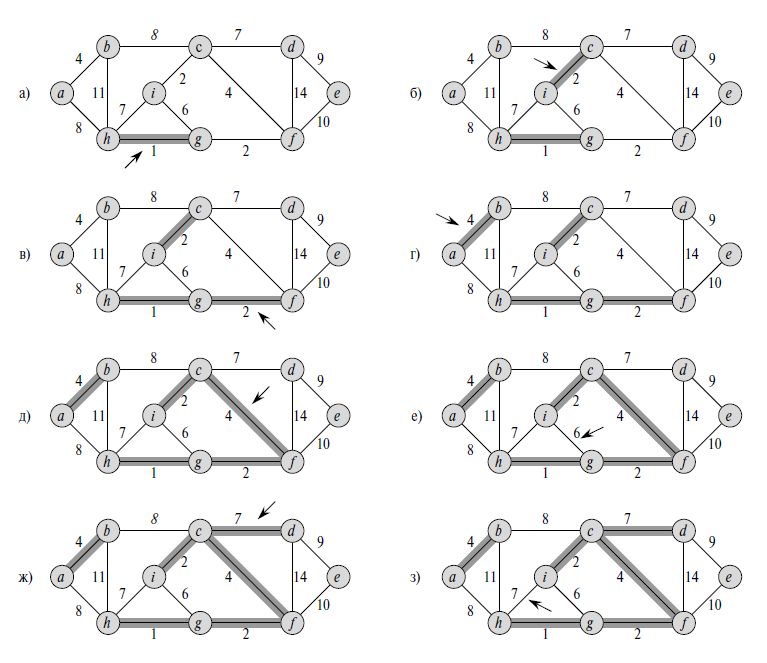


<details>
<summary>Cложность алгоритма крускала</summary>
$MST\_KRUSKAL(G,w)$<br>
$\quad A ← ∅$ //  $O(1)$<br>
$\quad \textbf{for}$ (Для) каждой вершины $v ∈ V [G]$<br>
$\quad \quad \textbf{do} \; MAKE\_SET(v)$<br>
$\quad $Сортируем ребра из $E$ в неубывающем порядке их весов $w$ // $O(|E|lg(|E|))$<br>
$\quad \textbf{for}$ (Для) каждого $(u, v) ∈ E$ (в порядке возрастания веса) //  $O(E)$<br>
$\quad \quad \textbf{do} \;\textbf{if}\; FIND\_SET(u) \neq FIND\_SET(v)$ // $O(lg(V))$<br>
$\quad \quad \quad \textbf{then} \; A ← A ∪ {(u, v)}$<br>
$\quad \quad \quad \quad UNION(u, v)$ // $O(lg(V))$ <br>
$\quad \textbf{return}\; A$<br>



итого сложность (E > V т.к граф связный)
$$O(Elg(E))$$
&emsp;
</details>

## Алгоритм Прима


$MST\_PRIM(G,w, r)$ <br>
$\quad \textbf{for}\; $(Для) каждой вершины $u ∈ V [G]$ <br>
$\quad \quad \textbf{do}\; key[u]←∞$ <br>
$\quad \quad \quad π[u] ← NIL$ <br>
$\quad key[r] ← 0$ <br>
$\quad Q ← V [G]$ <br>
$\quad \textbf{while}\; Q \neq ∅$ <br>
$\quad \quad \textbf{do}\; u ← EXTRACT\_MIN(Q)$ <br>
$\quad \quad \quad  \textbf{for}\;$ (Для) каждой вершины $v ∈ Adj [u]$ <br>
$\quad \quad \quad  \quad \textbf{do}\; \textbf{if}\; v ∈ Q\; и\; w(u, v) < key[v]$ <br>
$\quad \quad \quad  \quad \quad \textbf{then}\; π[v] ← u$ <br>
$\quad \quad \quad  \quad \quad  \quad key[v] ← w(u, v)$ <br>

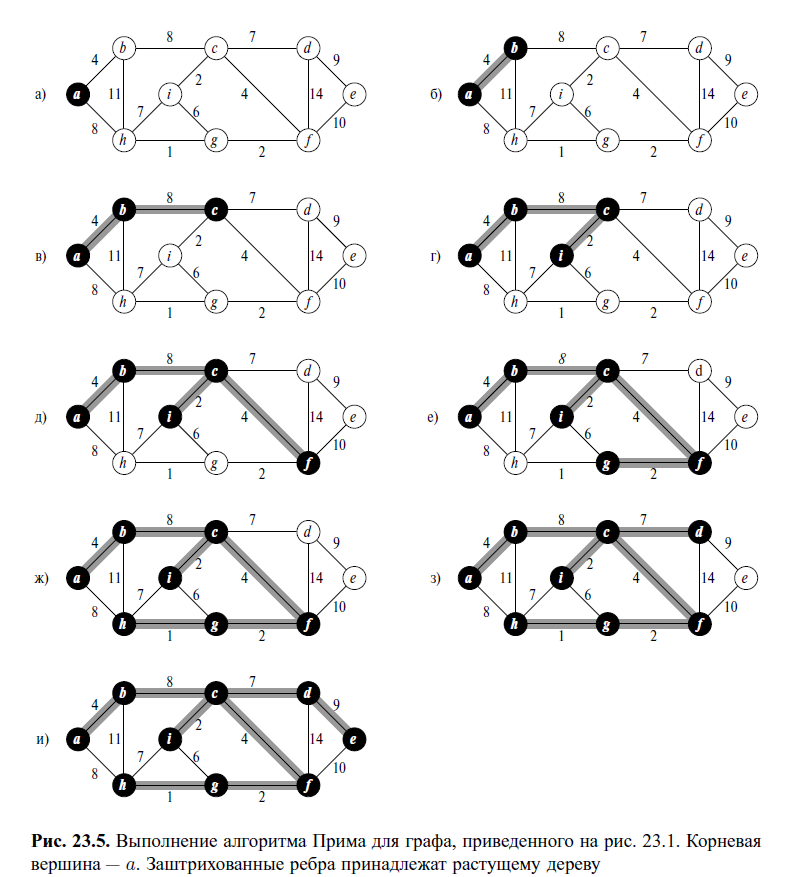


<details>
<summary>Cложность алгоритма Прима</summary>
$MST\_PRIM(G,w, r)$ <br>
$\quad \textbf{for}\; $(Для) каждой вершины $u ∈ V [G]$ \\ $O(V)$<br>
$\quad \quad \textbf{do}\; key[u]←∞$ <br>
$\quad \quad \quad π[u] ← NIL$ <br>
$\quad key[r] ← 0$ <br>
$\quad Q ← V [G]$ <br>
$\quad \textbf{while}\; Q \neq ∅$ \\ $O(V)$<br>
$\quad \quad \textbf{do}\; u ← EXTRACT\_MIN(Q)$  \\ $O(lg(V))$<br>
$\quad \quad \quad  \textbf{for}\;$ (Для) каждой вершины $v ∈ Adj [u]$  \\ $O(2E)$  всего! с учетом внешнего цикла<br>
$\quad \quad \quad  \quad \textbf{do}\; \textbf{if}\; v ∈ Q\; и\; w(u, v) < key[v]$ \\ $O(1)$ будем хранить для каждой вершины бит, указывающим, находится ли она в $Q$, и обновлять
этот бит при удалении вершины из $Q$.<br>
$\quad \quad \quad  \quad \quad \textbf{then}\; π[v] ← u$ <br>
$\quad \quad \quad  \quad \quad  \quad key[v] ← w(u, v)$  //decrease key?  $O(lgV)$<br>

Итого сложность
$$O(V*lg(V)+E*lg(V))$$
&emsp;
</details>


<details>
<summary>Cложность алгоритма Прима при использовании фиббоначиевой пирамиды</summary>
Однако асимптотическое время работы алгоритма Прима можно улучшить за
счет применения фибоначчиевых пирамид. Если $|V |$
элементов организованы в фибоначчиеву пирамиду, то операцию $EXCTARCT\_MIN$
можно выполнить за амортизированное время $O (lg (V) )$, а операцию $DECREASE\_
KEY$ — за амортизированное время $O (1)$. Следовательно, при использовании фи-
боначчиевой пирамиды для реализации очереди с приоритетами $Q$ общее время
работы алгоритма Прима улучшается до $O (E + V lg (V ))$.
&emsp;
</details>